<a href="https://colab.research.google.com/github/aiyappa02/Finance/blob/master/Using_LSTM_for_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#descrption uses RNN called LSTM, to predict the closing stockprice of a corporation using past 60 day stock price

In [0]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [13]:
df=web.DataReader('TSLA',data_source="yahoo",start='2012-01-01',end='2020-04-30')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000
...,...,...,...,...,...,...
2020-04-24,730.729980,698.179993,710.809998,725.150024,13237600,725.150024
2020-04-27,799.489990,735.000000,737.609985,798.750000,20681400,798.750000
2020-04-28,805.000000,756.690002,795.640015,769.119995,15222000,769.119995


In [14]:
df.shape

(2095, 6)

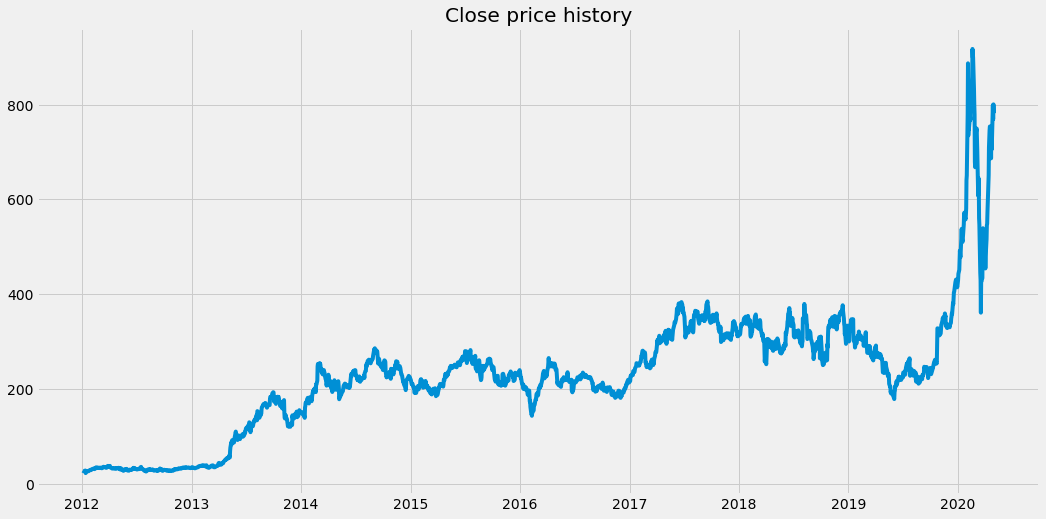

In [15]:
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel=('Date')
plt.ylabel=('Close price in $')
plt.show()

In [16]:
#dataframe with only close column
data=df.filter(['Close'])
#conert data =frame into numpyarray
dataset=data.values
#get no of rowa to train the model on
training_data_len=math.ceil(len(dataset)* 0.8)
print(training_data_len)

1676


In [21]:
#Scale the data
scaler= MinMaxScaler()
scaled_data=scaler.fit_transform(dataset)
print(scaled_data)

[[0.00591306]
 [0.00549948]
 [0.00483999]
 ...
 [0.83423316]
 [0.86932031]
 [0.84849605]]


In [24]:
#creating daaset
#creating scaled dataset
train_data=scaled_data[0:training_data_len, : ]
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00591306, 0.00549948, 0.00483999, 0.00460525, 0.0049853 ,
       0.00539888, 0.00608072, 0.00610308, 0.        , 0.00425874,
       0.00449348, 0.00443759, 0.00425874, 0.00444877, 0.00517532,
       0.0057901 , 0.00687435, 0.00731028, 0.00757855, 0.00701966,
       0.00758973, 0.00833864, 0.00934464, 0.0100712 , 0.00984765,
       0.01021651, 0.01094307, 0.00928876, 0.00972469, 0.01160256,
       0.01208321, 0.01273152, 0.01361457, 0.01308921, 0.01277623,
       0.01312274, 0.01225087, 0.01210556, 0.01231794, 0.01187083,
       0.01298861, 0.01257503, 0.01227323, 0.0115355 , 0.01154667,
       0.01149078, 0.01335748, 0.01477706, 0.01486648, 0.01397226,
       0.0136481 , 0.01400579, 0.01362574, 0.01360339, 0.01381577,
       0.01297743, 0.01261974, 0.01633077, 0.01693437, 0.01683377])]
[0.016252530328918307]

[array([0.00591306, 0.00549948, 0.00483999, 0.00460525, 0.0049853 ,
       0.00539888, 0.00608072, 0.00610308, 0.        , 0.00425874,
       0.00449348, 0.00443759, 0.0

In [0]:
x_train,y_train=np.array(x_train), np.array(y_train)

In [29]:
#reshape to t3d for lstm
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1616, 60, 1)

In [0]:
#lstm model
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#compile
model.compile(optimizer='adam', loss= 'mean_squared_error')


In [34]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

Epoch 1/1
1616/1616 [==============================] - 60s 37ms/step - loss: 2.5380e-04


In [0]:
#creating test dataset
test_data=scaled_data[training_data_len-60 : , : ]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range (60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [0]:
x_test=np.array(x_test)

In [0]:
#reshape 
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [0]:
#get th emodels predicted pricevalues
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [39]:
#get the RMSE
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

9.18135012533329

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


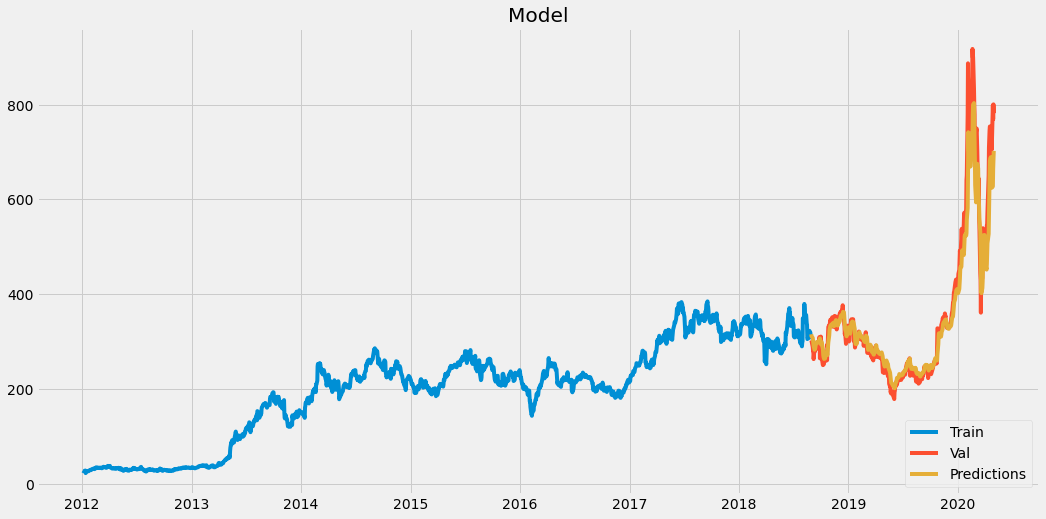

In [43]:
#to plot
train= data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']= predictions
#to visulaize
plt.figure(figsize=(16,8))
plt.title('Model')
#plt.xlabel('Date')
#plt.y_label('close price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [44]:
#comparing c=valid and predicted prices
valid

,Close,Predictions
Date,,
2018-08-30,303.149994,315.597015
2018-08-31,301.660004,311.274963
2018-09-04,288.950012,308.023712
2018-09-05,280.739990,302.308105
2018-09-06,280.950012,295.433563
...,...,...
2020-04-24,725.150024,624.784302
2020-04-27,798.750000,627.497070
2020-04-28,769.119995,664.371521


In [47]:
#to predict cost for 2020-05-01
tsla_quote=web.DataReader('TSLA',data_source='yahoo',start='2012-01-01',end='2020-04-30')
new_df=tsla_quote.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[705.17944]]


In [48]:
tsla_quote2=web.DataReader('TSLA',data_source='yahoo',start='2020-05-01',end='2020-05-01')
print(tsla_quote2['Close'])

Date
2020-05-01    701.320007
2020-05-01    701.320007
Name: Close, dtype: float64
